In [57]:
import cv2
import numpy as np
from  homography import apply_homography
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist

# Read Image

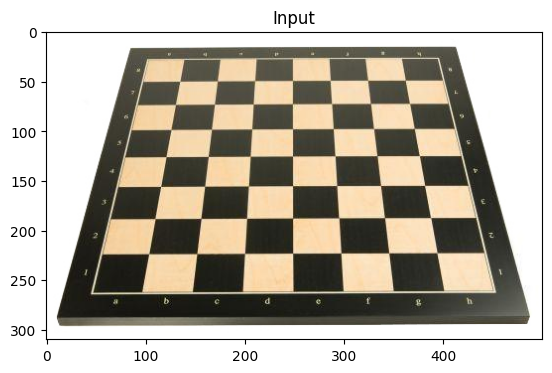

In [58]:
img = cv2.imread("../images/mb7552050zb_jpg.rf.51f6c470dac78877a2d582a1ef6290ad.jpg")
# img = cv2.resize(img, None, fx=0.25, fy=0.25)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Input')
plt.show()

# Convert to Grayscale

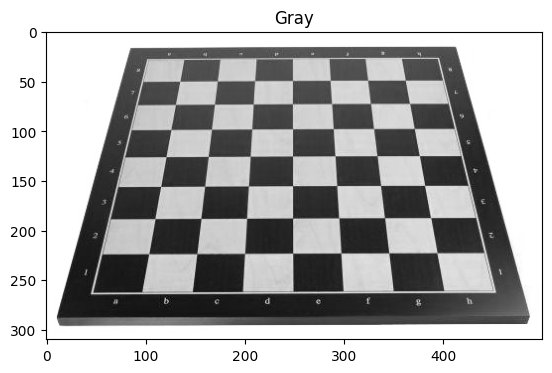

In [59]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('contour/2.jpg', gray)
plt.imshow(gray, cmap='gray')
plt.title('Gray')
plt.show()

# Add Bilateral Filter to reduce artifacts

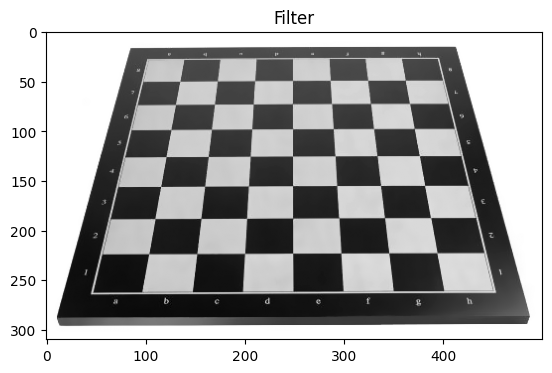

In [60]:
filtered = cv2.bilateralFilter(gray, 10, 10, 10)

plt.imshow(filtered, cmap='gray')
plt.title('Filter')
plt.show()

# Canny Edge Detection

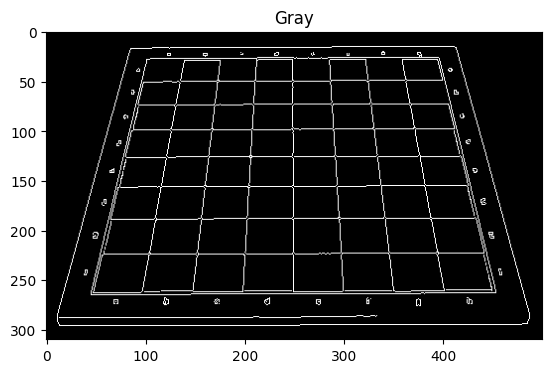

In [61]:
v = np.median(img)
sigma = 0.5
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))

canny = cv2.Canny(gray, lower, upper)

plt.imshow(canny, cmap='gray')
plt.title('Gray')
plt.show()

# Read largest contour and draw contour

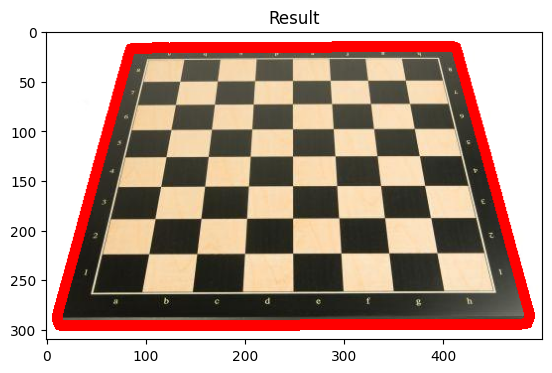

In [62]:
# Copy image and draw contour
img5 = img.copy()
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Get largest contour
contour = max(contours, key = cv2.contourArea)

cv2.drawContours(img5, contour, -1, (255, 0, 0), 10)

# Show image
plt.imshow(img5, cmap='gray')
plt.title('Result')
plt.show()

# Contour Approximation

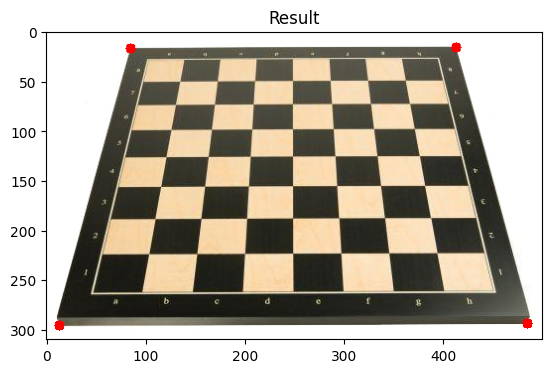

In [66]:
# Copy image and draw contour
img2 = img.copy()
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contour = max(contours, key = cv2.contourArea)

# Contour approx
epsilon = 0.1 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
cv2.drawContours(img2, approx, -1, (255, 0, 0), 10)

# Show image
plt.imshow(img2, cmap='gray')
plt.title('Result')
plt.show()

# Sort Corner Points

In [64]:
# Get points from contour
pts_1 = np.array(approx, dtype=np.float32).reshape(-1, 2)

xSorted = pts_1[np.argsort(pts_1[:, 0]), :]

leftMost = xSorted[:2, :]
rightMost = xSorted[2:, :]
    
leftMost = leftMost[np.argsort(leftMost[:, 1]), :]
(top_left, bottom_left) = leftMost
 
D = dist.cdist(top_left[np.newaxis], rightMost, "euclidean")[0]
(bottom_right, top_right) = rightMost[np.argsort(D)[::-1], :]

[[413.  16.]
 [ 85.  17.]
 [ 13. 296.]
 [485. 294.]]
[[ 13. 296.]
 [ 85.  17.]
 [413.  16.]
 [485. 294.]]


# Homography

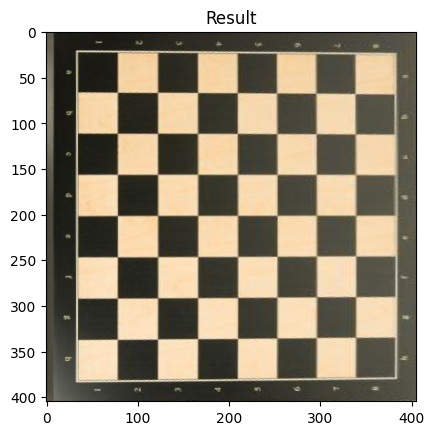

In [65]:
# Order points for homography
pts_1 = np.array([
    bottom_left,
    top_left,
    bottom_right,
    top_right,
], dtype=np.float32)

height, width, _ = img.shape
img_size = (height+width)//2
pts_2 = np.float32([[0, 0], [img_size, 0], [0, img_size], [img_size, img_size]])

# calculate matrix based on mapping pts_1 to pts_2
M = cv2.getPerspectiveTransform(pts_1, pts_2)

# apply homography
dst = cv2.warpPerspective(img, M, (img_size, img_size))

# Save image
dst = cv2.cvtColor(dst, cv2.COLOR_RGB2BGR)
cv2.imwrite('contour/7.jpg', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.imshow(dst, cmap='gray')
plt.title('Result')
plt.show()